<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cmath

In [17]:
"""Funzioni di Abbellimento"""
def central_ax(ax):

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.tick_params(
        axis='both',       # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        right=False,
        left=False,
        labelleft=False,
        labelbottom=False) # labels along the bottom edge are off
    # Axis name
    # x
    ax.xaxis.set_label_coords(1.05, 0.5)
    ax.set_xlabel('$D_1$')
    # y
    ax.yaxis.set_label_coords(0.52, 1.0)
    ylab = ax.set_ylabel('$D_2$')
    # rotate horizzontaly y
    ylab.set_rotation(0)
    return ax


def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin)
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


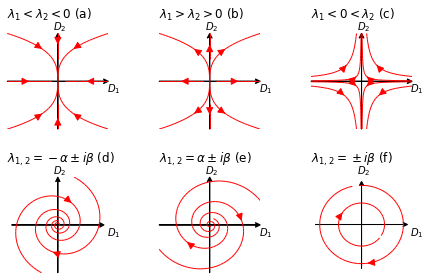

In [25]:
def param():
    l1 = -3
    l2 = -1
    dt = 0.01
    return l1, l2, dt   

def plot_curve(l1, l2, dt, seed_pt, a, ax, fig):
    D1, D2 = np.meshgrid(np.arange(-a, a + dt, dt), np.arange(-a, a + dt, dt))
    if l1.imag == 0 and l2.imag == 0:
        D1dot = D1*l1
        D2dot = D2*l2
    else:
        rho1, phi1 = cmath.polar(l1)
        rho2, phi2 = cmath.polar(l2)
        D1dot = rho1*(D1*np.cos(phi1) + D2*np.sin(phi1))
        D2dot = rho2*(D1*np.sin(phi2) + D2*np.cos(phi2))
    ax = central_ax(ax)
    ax.streamplot(D1, D2, D1dot, D2dot, color='red', linewidth=1., arrowsize=1.5, start_points=seed_pt.T)
    ax = arrowed_spines(fig, ax)
    return ax

def main():
    dt = 0.01
    a = 0.9
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(6,4))
    
    
    seed_pt = np.array([[-a, -a , -a, 0, 0, a, a, a], [-a, 0, a, -a , a, -a, 0, a]])
    plot = plot_curve(-3, -1, dt, seed_pt, a, ax1, fig)
    #plt.savefig("../../figures/15_lambda_neg.png", dpi = 300)
    #plt.show()
    
    
    
    plot = plot_curve(3, 1, dt, seed_pt, a, ax2, fig)
    #plt.savefig("../../figures/15_lambda_pos.png", dpi = 300)
    #plt.show()
    
    
    
    seed_pt = np.array([[a/10, -a/10, a, -a, 
                         -a , -a, a/100, -a/100, a],
                        [a, a, -a/10, -a/10,
                         a/100, -a/100, -a , a, a/100]])
    plot3 = plot_curve(-2, 2, dt, seed_pt, a, ax3, fig)
    #plt.savefig("../../figures/15_lambda_neg_pos.png", dpi = 300)
    #plt.show()
    
    
    l1 = -1 + 5*1j
    l2 = -1 - 5*1j
    seed_pt = np.array([[a/3, -a/3],
                        [-a/5, a/5]])
    plot4 = plot_curve(l1, l2, dt, seed_pt, a, ax4, fig)
    
    
    l1 = 1 + 5*1j
    l2 = 1 - 5*1j
    seed_pt = np.array([[a/3, -a/3],
                        [-a/5, a/5]])
    plot5 = plot_curve(l1, l2, dt, seed_pt, a, ax5, fig)
    
    
    l1 = + 5*1j
    l2 = - 5*1j
    seed_pt = np.array([[a/3, -a/2],
                        [-a/5, a/2]])
    plot6 = plot_curve(l1, l2, dt, seed_pt, a, ax6, fig)

    ax1.set_title(r'$\lambda_1 < \lambda_2 < 0$ (a)', loc='left', pad=15, fontsize=12)
    ax2.set_title(r'$\lambda_1 > \lambda_2 > 0$ (b)', loc='left', pad=15, fontsize=12)
    ax3.set_title(r'$\lambda_1 < 0 < \lambda_2$ (c)', loc='left', pad=15, fontsize=12)
    ax4.set_title(r'$\lambda_{1,2} = -\alpha \pm i\beta$ (d)', loc='left', pad=15, fontsize=12)
    ax5.set_title(r'$\lambda_{1,2} = \alpha \pm i\beta$ (e)', loc='left', pad=15, fontsize=12)
    ax6.set_title(r'$\lambda_{1,2} = \pm i\beta$ (f)', loc='left', pad=15, fontsize=12)


    plt.tight_layout()
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.savefig("../../figures/15_lambda.png", dpi = 300)
    plt.show()
main()

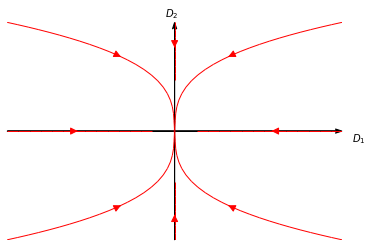

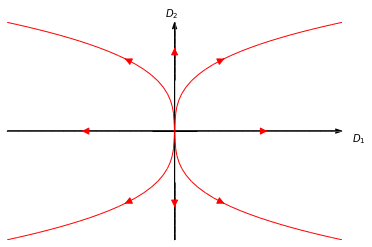

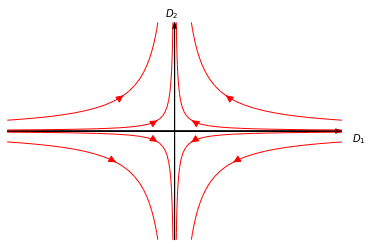

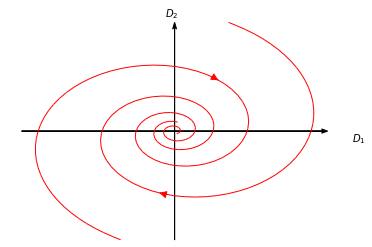

In [210]:
def separate_main():
    dt = 0.01
    a = 0.9
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    seed_pt = np.array([[-a, -a , -a, 0, 0, a, a, a], [-a, 0, a, -a , a, -a, 0, a]])
    plot = plot_curve(-3, -1, dt, seed_pt, a, ax, fig)
    plt.savefig("../../figures/15_lambda_neg.png", dpi = 300)
    plt.show()
    
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plot = plot_curve(3, 1, dt, seed_pt, a, ax, fig)
    plt.savefig("../../figures/15_lambda_pos.png", dpi = 300)
    plt.show()
    
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    seed_pt = np.array([[a/10, -a/10, a, -a, 
                         -a , -a, a/100, -a/100, a],
                        [a, a, -a/10, -a/10,
                         a/100, -a/100, -a , a, a/100]])
    plot3 = plot_curve(-2, 2, dt, seed_pt, a, ax, fig)
    plt.savefig("../../figures/15_lambda_neg_pos.png", dpi = 300)
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    l1 = -1 + 5*1j
    l2 = -1 - 5*1j
    seed_pt = np.array([[a/3, -a/3],
                        [-a/5, a/5]])
    plot4 = plot_curve(l1, l2, dt, seed_pt, a, ax, fig)
    plt.savefig("../../figures/15_lambda_complex.png", dpi = 300)
    plt.show()
separate_main()